# Hi IJ Roy

## Video 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [70]:
#creating the dataframe
df_transport = pd.read_csv('untidy_vehicle_data_toy.csv')
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000.0,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


In [71]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

### Remove Missing Values

In [72]:
df_transport = df_transport.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [73]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

In [74]:
print(df_transport['Date'])

0      10/1/2018
1      10/1/2018
2      10/1/2018
3      10/1/2018
4      10/1/2018
         ...    
494    12/3/2018
495    12/4/2018
496    12/5/2018
497    12/6/2018
498    12/7/2018
Name: Date, Length: 499, dtype: object


In [75]:
print(df_transport['Date'].isnull())

0      False
1      False
2      False
3      False
4      False
       ...  
494    False
495    False
496    False
497    False
498    False
Name: Date, Length: 499, dtype: bool


In [76]:
print("Rows :",df_transport.shape[0])
print("Columns :",df_transport.shape[1])
print("Feature :",df_transport.columns.to_list())
print("Unique :")
print(df_transport.nunique())
print("Missing Values :",df_transport.isnull().sum().values.sum())

Rows : 499
Columns : 7
Feature : ['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']
Unique :
Date          130
Zip Code        4
Model Year     15
Fuel            8
Make           43
Light_Duty      2
Vehicles      151
dtype: int64
Missing Values : 0


In [77]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        499 non-null    object 
 1   Zip Code    499 non-null    float64
 2   Model Year  499 non-null    object 
 3   Fuel        499 non-null    object 
 4   Make        499 non-null    object 
 5   Light_Duty  499 non-null    object 
 6   Vehicles    499 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.4+ KB


### Convert date feature to Datetime Format

In [78]:
#Convert date feature to Datetime Format
df_transport['Date'] = pd.to_datetime(df_transport['Date'],format="%m/%d/%Y")


In [79]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ KB


### Parsing the Datetime Format

In [80]:
#Parse date time format 
df_transport['year'] = df_transport['Date'].dt.year
df_transport['month'] = df_transport['Date'].dt.month
df_transport['day'] = df_transport['Date'].dt.day
# df_transport['hour'] = df_transport['Date'].dt.hour
# df_transport['minute'] = df_transport['Date'].dt.minute
# df_transport['second'] = df_transport['Date'].dt.second
# df_transport['millisecond'] = df_transport['Date'].dt.millisecond

In [81]:
df_transport.head()
# df_transport.info()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
2,2018-10-01,90000.0,<2006,Gasoline,OTHER/UNK,Yes,13.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
4,2018-10-01,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0,2018,10,1


In [82]:
grouped_data = df_transport.groupby(['Zip Code','Model Year','Fuel','Make','Light_Duty','Vehicles'])
df_transport.groupby(['Fuel']).first()

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles,year,month,day
Fuel,,,,,,,,,
Battery Electric,2018-10-01,90000.0,<2006,OTHER/UNK,No,4.0,2018,10,1
Diesel and Diesel Hybrid,2018-10-01,90000.0,<2006,OTHER/UNK,No,55.0,2018,10,1
Flex-Fuel,2018-10-14,90001.0,2007,Type_A,Yes,78.0,2018,10,14
Gasoline,2018-10-01,90000.0,2006,OTHER/UNK,Yes,1.0,2018,10,1
Hybrid Gasoline,2018-10-24,90001.0,2009,OTHER/UNK,Yes,18.0,2018,10,24
Natural Gas,2018-10-25,90001.0,2009,OTHER/UNK,No,2.0,2018,10,25
Other,2018-10-08,90000.0,<2006,OTHER/UNK,Yes,6.0,2018,10,8
Plug-in Hybrid,2018-11-02,90001.0,2012,OTHER/UNK,Yes,1.0,2018,11,2


### Visualise Data

Text(0.5, 1.0, 'Vehice by month')

<Figure size 1000x600 with 0 Axes>

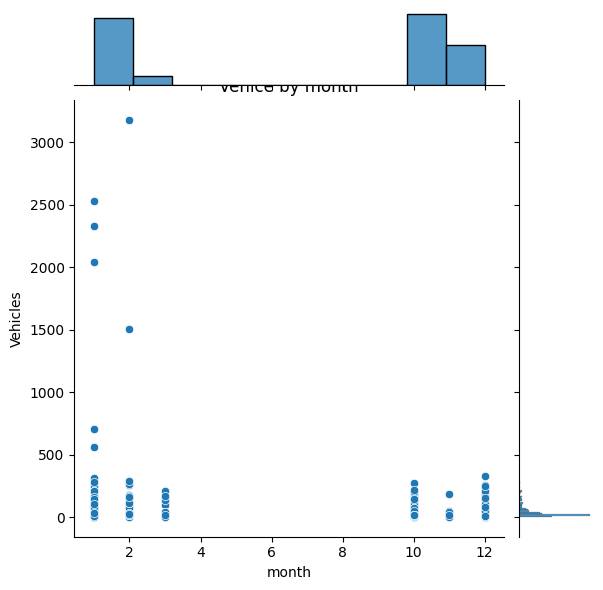

In [83]:
plt.figure(figsize=[10,6])
sns.jointplot(x="month",y="Vehicles",data = df_transport)
plt.title("Vehice by month")

### Rename

In [84]:
df_transport = df_transport.rename(columns= {"Date":"date","Zip Code":"zipcode","Model Year":"modelyear","Fuel":"fuel","Make":"make","Light_Duty":"lightduty","Vehicles":"vehicle"})

In [85]:
df_transport.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicle,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
2,2018-10-01,90000.0,<2006,Gasoline,OTHER/UNK,Yes,13.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
4,2018-10-01,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0,2018,10,1


### Remove Unwanted Values

In [86]:
df = df_transport.loc[df_transport.modelyear != '<2006'].copy()

In [87]:
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicle,year,month,day
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0,2018,10,1
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,No,16.0,2018,10,9
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,No,23.0,2018,10,10


In [88]:
df['modelyear'].value_counts()

modelyear
2007    53
2008    45
2006    36
2010    34
2014    31
2015    30
2017    29
2016    29
2013    27
2009    25
2012    25
2011    24
2018    23
2019     5
Name: count, dtype: int64

### OneHot Encoding

In [89]:
df['lightduty'].value_counts()

lightduty
Yes    374
No      42
Name: count, dtype: int64

In [90]:
df.loc[:,'lightduty'] = df.loc[:,'lightduty'].apply(lambda x: 0 if x == 'No' else 1)
df['lightduty'].value_counts()

lightduty
1    374
0     42
Name: count, dtype: int64

In [91]:
data_dummy = pd.get_dummies(df[['zipcode','modelyear','fuel','make']],drop_first=True).astype(int)
data_dummy.head()


,zipcode,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,modelyear_2015,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,90000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90001,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,90000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# data_dummy = data_dummy.astype(int)


In [93]:
df = pd.concat([df,data_dummy],axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicle,year,month,day,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,2018,10,1,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,2018,10,9,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,2018,10,10,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df = df.drop(['date','zipcode','modelyear','fuel','make'],axis=1)
df.head()

,lightduty,vehicle,year,month,day,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,2018,10,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,16.0,2018,10,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,23.0,2018,10,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
